# Single image preprocessing and feature extraction

This notebook explorese the techniques to be used for preprocessing and feature extraction for the dataset of cropped taro leaf images.

### Importing libraries

In [1]:
import cv2
import numpy as np
import mahotas as mt
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

### Loading the image

All leaf image dataset is located at the `/dataset` folder, with each subfolder as the category to be classified such as `/healthy`, `/leaf_blight`, etc.

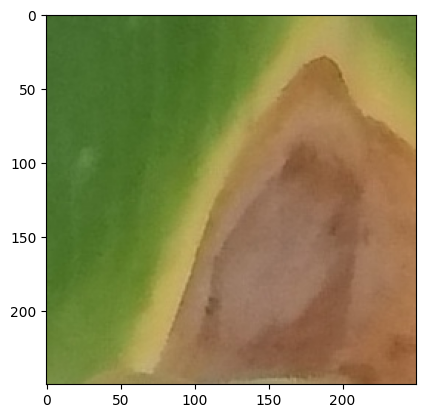

In [2]:
img = cv2.imread('dataset/infected2/patch_3750_2500_m0_r45_IMG_20240205_154038.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

### Image smoothing using Gaussian filter

Gaussian filter is used to reuce the noise of the image.

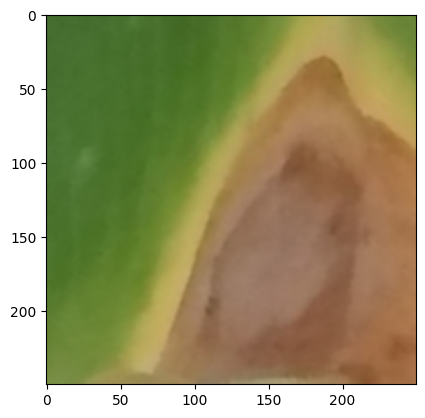

In [4]:
blur_img = cv2.GaussianBlur(img, (5,5),0)
rgb_img = cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img);

## Morphological processing

### Color features

Calculating the mean and standard deviation of the rgb and hsv channels of the image.

In [10]:
# rgb channel
red_ch = rgb_img[:,:,0]
green_ch = rgb_img[:,:,1]
blue_ch = rgb_img[:,:,2]

# hsv channel
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
hue_ch = hsv_img[:,:,0]
sat_ch = hsv_img[:,:,1]
val_ch = hsv_img[:,:,2]

int_ch = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

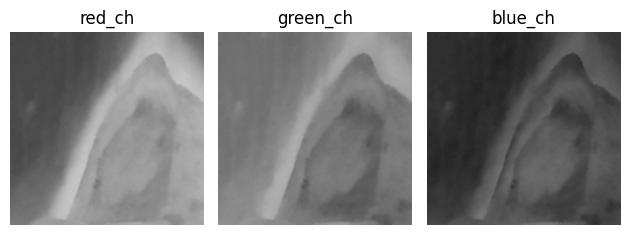

In [16]:
# visualization of rgb channels
fig, axes = plt.subplots(1,3)
titles = ['red_ch', 'green_ch', 'blue_ch']
for i in range(3):
    axes[i].imshow(rgb_img[:,:,i], cmap='gray', clim=(0, 255))
    axes[i].set_axis_off()
    axes[i].set_title(titles[i])

fig.tight_layout();

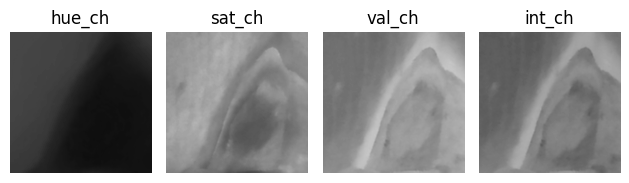

In [17]:
# visualization of hsv and i channels
fig, axes = plt.subplots(1,4)
titles2 = ['hue_ch', 'sat_ch', 'val_ch', 'int_ch']

axes[0].imshow(hue_ch, cmap='gray', clim=(0, 179))
axes[0].set_axis_off()
axes[0].set_title(titles2[0])

for i in range(1,3):
    axes[i].imshow(hsv_img[:,:,i], cmap='gray', clim=(0, 255))
    axes[i].set_axis_off()
    axes[i].set_title(titles2[i])

axes[3].imshow(int_ch, cmap='gray', clim=(0, 255))
axes[3].set_axis_off()
axes[3].set_title(titles2[3])

fig.tight_layout()

In [25]:
channels = [red_ch, green_ch, blue_ch, hue_ch, sat_ch, val_ch, int_ch]
titles3 = titles + titles2

print('channel \t mean \t\t stdev\n')
for i in range(len(channels)):
    print(titles3[i],' \t', np.mean(channels[i]), '\t', np.std(channels[i]))

channel 	 mean 		 stdev

red_ch  	 130.3816 	 39.04182922763737
green_ch  	 124.481872 	 19.115681713598814
blue_ch  	 67.578464 	 20.15206836532429
hue_ch  	 27.758512 	 14.488677080598354
sat_ch  	 137.780688 	 22.09707777618244
val_ch  	 144.51952 	 22.947928250053426
int_ch  	 119.7584 	 21.05332803715365


### Texture features

Haralick features were described based on the image's intensity channel, which is also the grayscaled version image.

In [26]:
textures_mean = mt.features.haralick(int_ch, return_mean=True)
print(textures_mean)

[   0.00434001    3.6498637     0.99588147  443.10597577    0.60250414
  239.52093207 1768.7740394     7.12399829    8.62757185    0.00184152
    1.96806004   -0.59317314    0.99961137]


Relevant features that influence the classification of the leaf image were selected, based on testing of a large sample of image datasets.

In [27]:
print(textures_mean[0]) # angular second moment
print(textures_mean[4]) # inverse difference moment
print(textures_mean[7]) # entropy
print(textures_mean[8]) # difference variance
print(textures_mean[9]) # difference entropy

0.004340005660020851
0.6025041426569971
7.123998287278605
8.627571847310403
0.0018415205535681012
